### Introduction 

online_shoppers_intention.csv on UCI Machine Learning Repository consists of 12,330
sessions with 84.5% negative class samples, i.e.; it was not ended with shopping, Only 15.5%
did shopping. 

Data set has 18 attributes.

Repository dataset as it is filtered to make sure each session would belong to a different user in a 1-year period to
avoid any tendency to a specific campaign, special day, user profile or period.

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

### DATA WRANGLING

In [123]:
np.min(df['Administrative']), np.min(df['Administrative_Duration']), np.min(df['Informational']),np.min(df['Informational_Duration']), np.min(df['ProductRelated']), np.min(df['ProductRelated_Duration']) 


(0.0, -1.0, 0.0, -1.0, 0.0, -1.0)

In [124]:
np.max(df['Administrative']), np.max(df['Administrative_Duration']), np.max(df['Informational']),np.max(df['Informational_Duration']), np.max(df['ProductRelated']), np.max(df['ProductRelated_Duration'])  


(27.0, 3398.75, 24.0, 2549.375, 705.0, 63973.522229999995)

#### We filter out any time_duration that is negative, as well as the null values  

In [125]:
df = df[ df.Administrative_Duration>=0.0 ]
df = df[ df.Informational_Duration>=0.0 ]
df = df[ df.ProductRelated_Duration>=0.0 ]

In [126]:
df = df[~df.Administrative.isnull()]
df = df[~df.Administrative_Duration.isnull()]   
df = df[~df.Informational.isnull()] 
df = df[~df.Informational_Duration.isnull()]
df = df[~df.ProductRelated.isnull()]
df = df[~df.ProductRelated_Duration.isnull()]

In [127]:
df = df[~df.ProductRelated_Duration.isnull()]   
len(df)*100/12330

99.61881589618815

### Features

Data set consists of 10 numerical and 8 categorical attributes. 

In [128]:
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month
0,0.0,0.0,0.0,0.0,1.0,0.200000,0.200000,0.0,0.0,Feb
1,0.0,0.0,0.0,0.0,2.0,0.000000,0.100000,0.0,0.0,Feb
3,0.0,0.0,0.0,0.0,2.0,0.050000,0.140000,0.0,0.0,Feb
4,0.0,0.0,0.0,0.0,10.0,0.020000,0.050000,0.0,0.0,Feb
5,0.0,0.0,0.0,0.0,19.0,0.015789,0.024561,0.0,0.0,Feb


In [129]:
df [ ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue'] ].head()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,1,1,Returning_Visitor,False,False
1,2,2,1,2,Returning_Visitor,False,False
3,3,2,2,4,Returning_Visitor,False,False
4,3,3,1,4,Returning_Visitor,True,False
5,2,2,1,3,Returning_Visitor,False,False


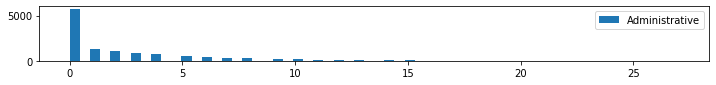

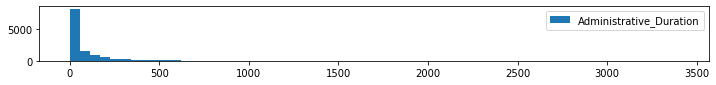

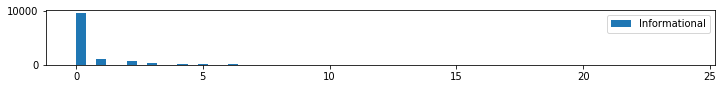

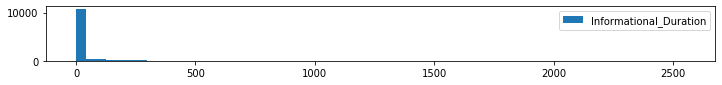

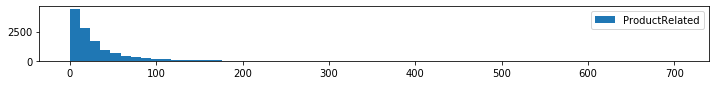

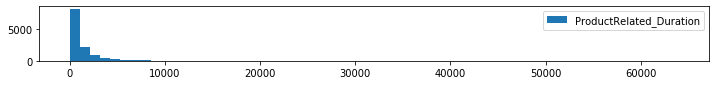

In [130]:
cols1 = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
for col in cols1:
    plt.figure(figsize=(12,1))
    plt.hist(df[col], bins=60, label=col)
    plt.legend()
    plt.grid()
    plt.grid()
    plt.plot()

In [131]:
df1 = df[ df['Revenue']==True ]
df2 = df[ df['Revenue']==False ]

In [132]:
df['Revenue'].value_counts()

False    10375
True      1908
Name: Revenue, dtype: int64

In [133]:
df['Revenue'].value_counts()[0]/df['Revenue'].value_counts().sum(), df['Revenue'].value_counts()[1]/df['Revenue'].value_counts().sum()

(0.8446633558576895, 0.15533664414231052)

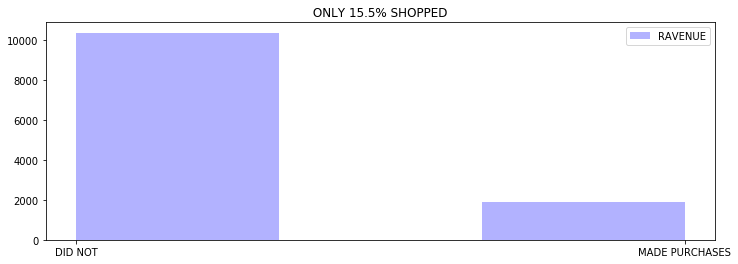

In [134]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else 0 ).hist(bins=3, alpha=0.3, color='blue', label='RAVENUE')
plt.grid()
plt.xticks([0,1],('DID NOT', 'MADE PURCHASES'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ONLY 15.5% SHOPPED ')
plt.show()

#### REVENUE VS Weekend 

In [135]:
df1['Weekend'].value_counts()

False    1409
True      499
Name: Weekend, dtype: int64

In [136]:
df1['Weekend'].value_counts()[0]/df1['Weekend'].value_counts().sum(), df1['Weekend'].value_counts()[1]/df1['Weekend'].value_counts().sum()

(0.7384696016771488, 0.26153039832285113)

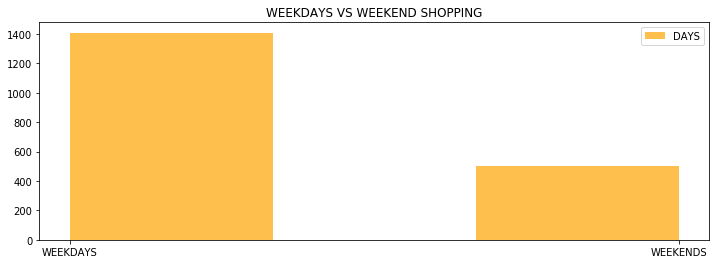

In [137]:
plt.figure(figsize=(12,4))
df1['Weekend'].apply(lambda x: 1 if (x==True) else 0).hist(bins=3, alpha=0.7, color='orange', label='DAYS')
plt.grid()
plt.xticks([0,1],('WEEKDAYS', 'WEEKENDS'))
plt.autoscale(enable=True)
plt.legend()
plt.title('WEEKDAYS VS WEEKEND SHOPPING')
plt.show()

#### REVENUE VS MONTH

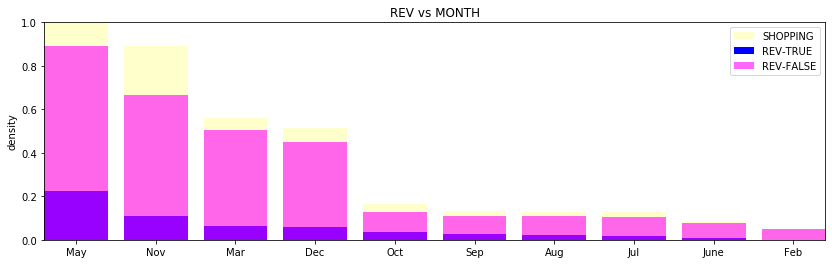

In [138]:
y0 = df['Month'].value_counts().values/np.max(df['Month'].value_counts().values)
y1 = df1['Month'].value_counts().values/np.max(df['Month'].value_counts().values)
y2 = df2['Month'].value_counts().values/np.max(df['Month'].value_counts().values)

plt.figure(figsize=(14,4))

plt.bar(df['Month'].value_counts().index,y0,alpha=0.2, color='yellow', label='SHOPPING' )
plt.bar(df['Month'].value_counts().index,y1,alpha=1.0, color='blue', label='REV-TRUE' )
plt.bar(df['Month'].value_counts().index,y2,alpha=0.6, color='magenta', label='REV-FALSE' )

plt.legend()
plt.title('REV vs MONTH')
plt.ylabel('density')
plt.autoscale(tight=True, enable=True)
plt.show()

### PIE CHARTS VIS

In [139]:
df['VisitorType'].value_counts()

Returning_Visitor    10504
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [140]:
pie_val = [ df1['VisitorType'].value_counts()[0]/df1['VisitorType'].value_counts().sum(), df1['VisitorType'].value_counts()[1]/df1['VisitorType'].value_counts().sum(), df1['VisitorType'].value_counts()[1]/df1['VisitorType'].value_counts().sum() ]
pie_val

[0.7704402515723271, 0.22117400419287211, 0.22117400419287211]

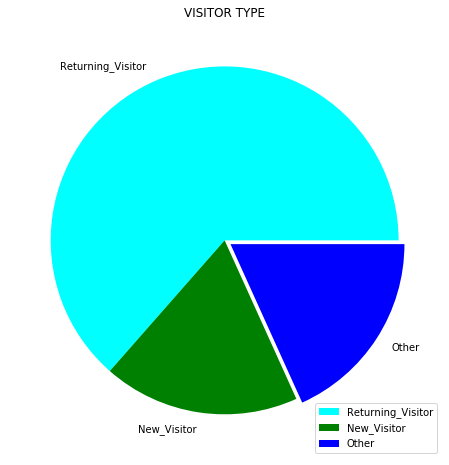

In [141]:
plt.figure(figsize=(8,8))
plt.pie(pie_val, colors = ['cyan', 'green', 'blue'], explode=[0, 0, 0.04], labels = ['Returning_Visitor', 'New_Visitor', 'Other']  )
plt.legend()
plt.title('VISITOR TYPE')
plt.show()

In [142]:
df1['OperatingSystems'].value_counts()

2    1155
1     379
3     268
4      85
8      17
6       2
7       1
5       1
Name: OperatingSystems, dtype: int64

In [143]:
opsys = []
for val in df1['OperatingSystems'].value_counts():
    opsys.append(val)
 

opsys

[1155, 379, 268, 85, 17, 2, 1, 1]

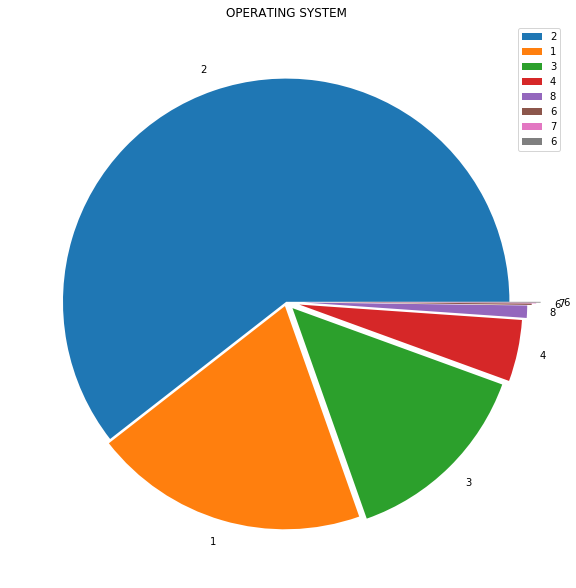

In [144]:
plt.figure(figsize=(10,12))
lab_list = ['2', '1', '3', '4', '8', '6', '7', '6'] 
exp_list = [0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14]
plt.pie(opsys, labels = lab_list, explode = exp_list )
plt.legend()
plt.title('OPERATING SYSTEM')
plt.show()

In [145]:
df1['SpecialDay'].value_counts()

0.0    1831
0.6      29
0.2      14
0.4      13
0.8      11
1.0      10
Name: SpecialDay, dtype: int64

In [146]:
SP_DAY = []
category = []
idx = 0
norm = df1['SpecialDay'].value_counts().sum()
for val in df1['SpecialDay'].value_counts():
    SP_DAY.append(val/norm)
    category.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 


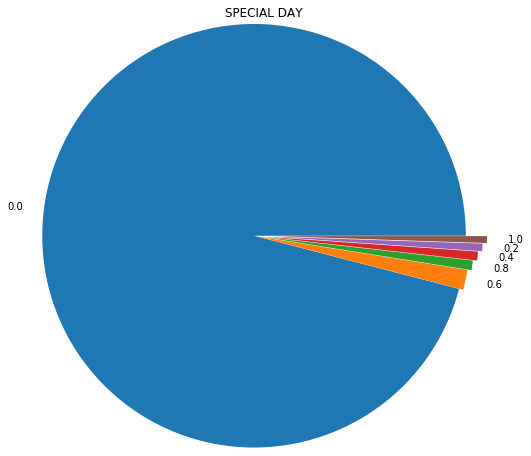

In [147]:
plt.figure(figsize=(8,10))
plt.pie(SP_DAY, labels=category, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10] )
plt.autoscale(enable=True, tight=True)
plt.title('SPECIAL DAY')
plt.grid()
plt.show()

In [148]:
df1['Region'].value_counts()

1    771
3    349
2    188
4    175
7    119
6    112
9     86
8     56
5     52
Name: Region, dtype: int64

In [149]:
re_gion = []
categoryr = []
idx = 0
norm = df1['SpecialDay'].value_counts().sum()
for val in df1['SpecialDay'].value_counts():
    re_gion.append(val/norm)
    categoryr.append(df1['SpecialDay'].value_counts().index[idx])
    idx += 1 

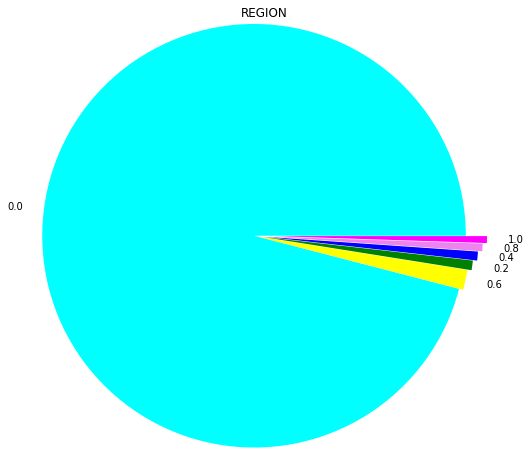

In [150]:
plt.figure(figsize=(8,10))
plt.pie(re_gion, labels=categoryr, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10], colors=['cyan','yellow','green','blue','violet','magenta'] )
plt.autoscale(enable=True, tight=True)
plt.title('REGION')
plt.grid()
plt.show()

### FEATURE ANALYSIS

#### VISITOR-TYPE

In [151]:
df1['VisitorType'].value_counts()

Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: VisitorType, dtype: int64

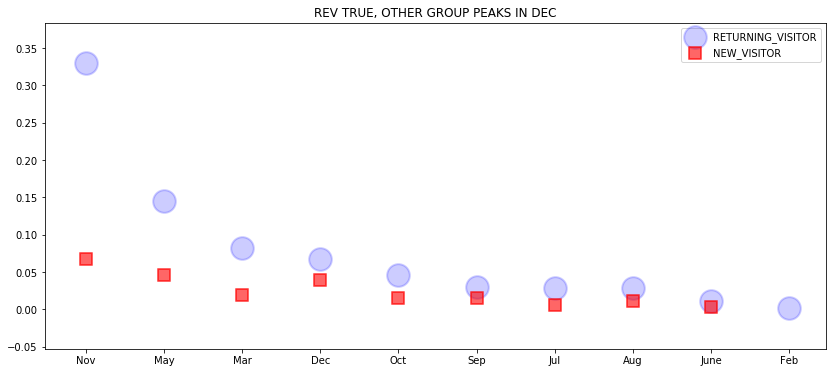

In [152]:
df1_11 = df1[ df1['VisitorType']=='Returning_Visitor' ]
x1 = np.array(df1_11['Month'].value_counts().index)
y1 = np.array(df1_11['Month'].value_counts().values)/np.sum(np.array(df1['Month'].value_counts().values))

df1_2 = df1[ df1['VisitorType']=='New_Visitor' ]
x2 = np.array(df1_2['Month'].value_counts().index)
y2 = np.array(df1_2['Month'].value_counts().values)/np.sum(np.array(df1['Month'].value_counts().values))

plt.figure(figsize=(14,6))
plt.scatter(x1,y1,label='RETURNING_VISITOR',s=2**9, c='blue', marker='o',linewidths=2, alpha=0.2, facecolor=None)
plt.scatter(x2,y2,label='NEW_VISITOR', s=2**7, c='red', marker='s',linewidths=2,alpha=0.6,facecolor=None )

plt.legend()
plt.title('REV TRUE, OTHER GROUP PEAKS IN DEC')
plt.show()


### WEEKDAYS vs WEEKEND

In [153]:
df1['Weekend'].value_counts()

False    1409
True      499
Name: Weekend, dtype: int64

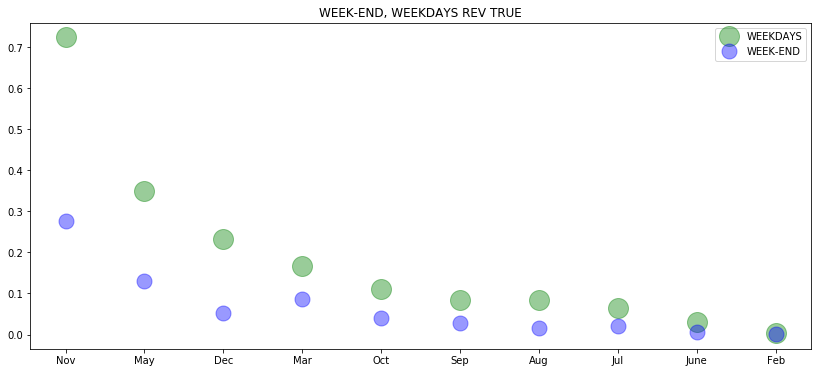

In [154]:
df1_1 = df1[ df1['Weekend']==False ]
xx1 = np.array(df1_1['Month'].value_counts().index)
yy1 = np.array(df1_1['Month'].value_counts().values)/np.max(np.array(df1['Month'].value_counts().values))


df1_1 = df1[ df1['Weekend']==True ]
xx2 = np.array(df1_1['Month'].value_counts().index)
yy2 = np.array(df1_1['Month'].value_counts().values)/np.max(np.array(df1['Month'].value_counts().values))

plt.figure(figsize=(14,6))
plt.plot(xx1,yy1,label='WEEKDAYS',color='green',marker='o',markersize=20, alpha=0.4, linestyle='none')
plt.plot(xx2,yy2,label='WEEK-END',color='blue',marker='o',markersize=15,linestyle='none',alpha=0.4  )

plt.title('WEEK-END, WEEKDAYS REV TRUE')
plt.legend()
plt.show()

##### We found here the week-end REV has a bulge in the month of MARCH otherwise weekend and weekdays revenue varied pretty much in consistent manner. 

### STATISTICAL ANALYSIS

In [155]:
len(df.columns), df.columns[0:6], df.columns[8], df.columns[17]

(18, Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
       dtype='object'), 'PageValues', 'Revenue')

In [156]:
cols = [ 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

### INFERENTIAL COMPARISON BETWEEN TWO GROUPS

In [157]:
import scipy 
from scipy.stats import norm
from scipy.stats import ttest_ind

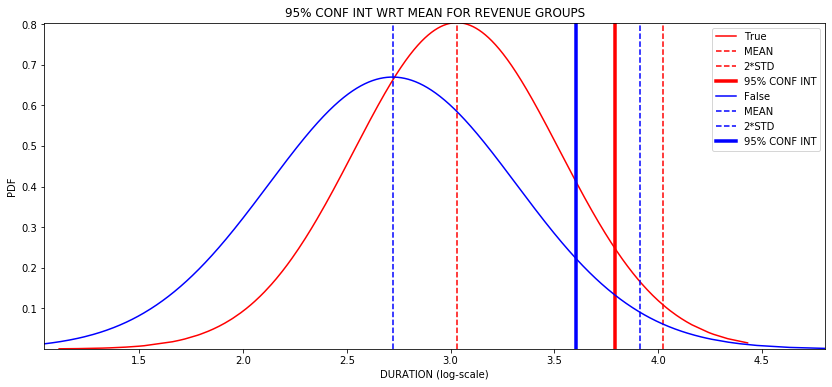

In [158]:
idx = 0
plt.figure(figsize=(14,6))
bolls = [True, False]
colr_data = ['red', 'blue']
for col in bolls:
    df1_1 = df[df['Revenue'] == col]
    df1_1 = df1_1[ df1_1['ProductRelated_Duration'] >10 ]
    datalog = np.sort(df1_1['ProductRelated_Duration'].apply(np.log10))
    datalog_pdf=scipy.stats.norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = scipy.stats.norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    plt.plot(datalog, datalog_pdf, color=colr_data[idx], label=col)
    plt.axvline(np.mean(datalog), linestyle='--', color=colr_data[idx], label='MEAN')
    plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', color=colr_data[idx], label='2*STD')
    plt.axvline(np.percentile(datalog, [95]), linestyle='-', color=colr_data[idx], label='95% CONF INT', linewidth=3.5)
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('DURATION (log-scale)')
    plt.title('95% CONF INT WRT MEAN FOR REVENUE GROUPS')
    plt.autoscale(tight=True, enable=True)
    idx += 1

#### Clients ProductRelated_Duration (log scale) vs the probability distribution function (PDF) shows that clients ProductRelated_Duration with respect to the mean is close to 2 time the STD, can be predicted with 95% confidence.


#### The mean of the ProductRelated_Duration for revenue positive is higher than that of revenue negative   

#### HYPOTHESIS

In [159]:
df_RT = df[df['Revenue'] == True]
df_RF = df[df['Revenue'] == False]

df1 = df_RT[ df_RT['ProductRelated_Duration'] >10 ]
df2 = df_RF[ df_RF['ProductRelated_Duration'] >10 ]

ttest_ind(df1['ProductRelated_Duration'], df2['ProductRelated_Duration'], equal_var=False)

Ttest_indResult(statistic=12.952064466401076, pvalue=3.959749814353132e-37)

Since the p value of ttest is less than 0.05, so the hypothesis is correct.

[]

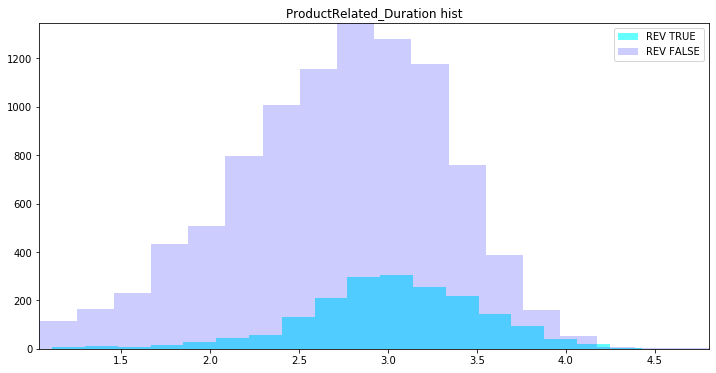

In [160]:
plt.figure(figsize=(12,6))
df1['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.6, color='cyan', label='REV TRUE')
df2['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.2, color='blue', label='REV FALSE')
plt.grid()
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('ProductRelated_Duration hist')
plt.plot()

## ML PREDICTIONS

In [161]:
df['Revenue'].replace(to_replace=[True,False], value=[1,0],inplace=True)
df['Revenue'].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

In [162]:
df['Weekend'].replace(to_replace=[True,False], value=[1,0], inplace=True)
df['Weekend'].value_counts()

0    9421
1    2862
Name: Weekend, dtype: int64

In [163]:
df['VisitorType'].replace(to_replace=['Returning_Visitor', 'New_Visitor', 'Other'], value=[0,1,2], inplace=True)
df['VisitorType'].value_counts()

0    10504
1     1694
2       85
Name: VisitorType, dtype: int64

In [164]:
df['Month'].replace(to_replace=['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'], value=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], inplace=True)


In [165]:
df['Month'].value_counts()

1     3357
2     2995
3     1884
4     1727
5      549
6      448
7      433
8      431
9      288
10     171
Name: Month, dtype: int64

In [166]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,10,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,10,2,2,1,2,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,10,3,2,2,4,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,10,3,3,1,4,0,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,10,2,2,1,3,0,0,0


In [167]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [168]:
X1 = df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

In [169]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X1).transform(X1)

In [170]:
X[0:5,:]

array([[-0.6989074 , -0.45823768, -0.39724702, -0.24540834, -0.69287492,
        -0.62596153,  3.73872644,  3.28156498, -0.31784528, -0.30903082,
         3.10238942, -1.23323635, -0.79024116, -0.89392928, -0.76317216,
        -0.40191529, -0.55117094],
       [-0.6989074 , -0.45823768, -0.39724702, -0.24540834, -0.67041292,
        -0.59255612, -0.45557442,  1.1965676 , -0.31784528, -0.30903082,
         3.10238942, -0.13636147, -0.20789582, -0.89392928, -0.51474124,
        -0.40191529, -0.55117094],
       [-0.6989074 , -0.45823768, -0.39724702, -0.24540834, -0.67041292,
        -0.62456964,  0.59300079,  2.03056655, -0.31784528, -0.30903082,
         3.10238942,  0.96051341, -0.20789582, -0.47758934, -0.01787942,
        -0.40191529, -0.55117094],
       [-0.6989074 , -0.45823768, -0.39724702, -0.24540834, -0.49071691,
        -0.29843194, -0.03614434,  0.15406891, -0.31784528, -0.30903082,
         3.10238942,  0.96051341,  0.37444952, -0.89392928, -0.01787942,
        -0.40191529

In [171]:
y = df['Revenue']
y[0:5]

0    0
1    0
3    0
4    0
5    0
Name: Revenue, dtype: int64

In [172]:
from sklearn.model_selection import train_test_split
x_tr, x_t, y_tr, y_t = train_test_split(X,y, test_size=0.35, random_state=100) 
print(" Train shape", x_tr.shape, y_tr.shape, ", Test shape", x_t.shape, y_t.shape)

 Train shape (7983, 17) (7983,) , Test shape (4300, 17) (4300,)


#### Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [174]:
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("Accuracy score : ", str(accuracy), ", ROC Score : ", str(roc))
print(classification_report(y_t, y_p))
print("Confusion Matrix : \n\n", confusion_matrix(y_t, y_p))

Accuracy score :  0.8804651162790698 , ROC Score :  0.6647514819881442
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3655
           1       0.70      0.36      0.47       645

   micro avg       0.88      0.88      0.88      4300
   macro avg       0.80      0.66      0.70      4300
weighted avg       0.87      0.88      0.86      4300

Confusion Matrix : 

 [[3556   99]
 [ 415  230]]


#### DecisionTreeClassifier

In [175]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
y_p = dtc.predict(x_t)
y_tr_p = dtc.predict(x_tr)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("Accuracy score : ", str(accuracy), ", ROC Score : ", str(roc))
print(classification_report(y_t, y_p))
print("Confusion Matrix : \n\n", confusion_matrix(y_t, y_p))

Accuracy score :  1.0 , ROC Score :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3596
           1       1.00      1.00      1.00       704

   micro avg       1.00      1.00      1.00      4300
   macro avg       1.00      1.00      1.00      4300
weighted avg       1.00      1.00      1.00      4300

Confusion Matrix : 

 [[3596    0]
 [   0  704]]


In [176]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

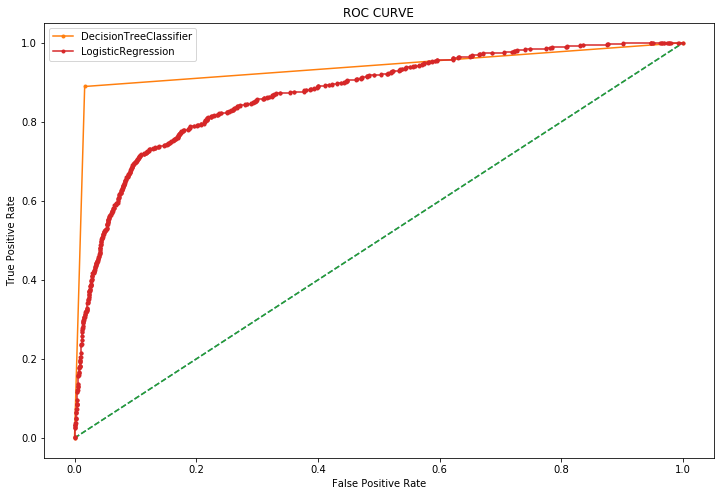

In [177]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 

MLclf = [DecisionTreeClassifier(),LogisticRegression() ]
lablist = ['DecisionTreeClassifier','LogisticRegression']

roc_list = []
for clf in MLclf: 
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    roc_score = roc_auc_score(y_t, y_p)
    roc_list.append(roc_score)
    idx += 1
    
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')